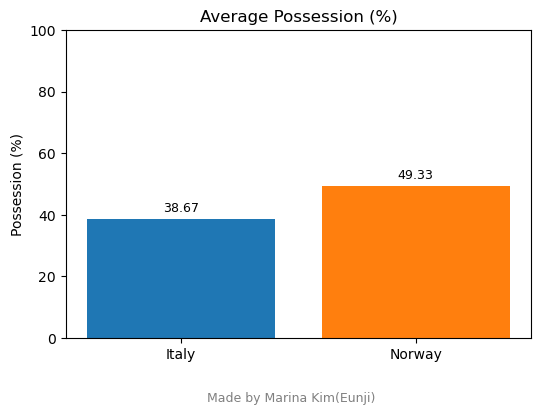

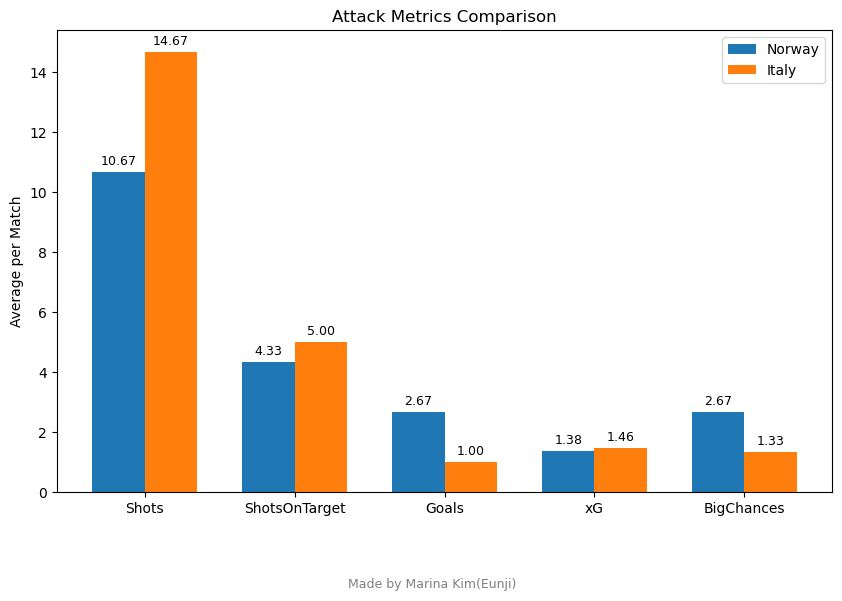

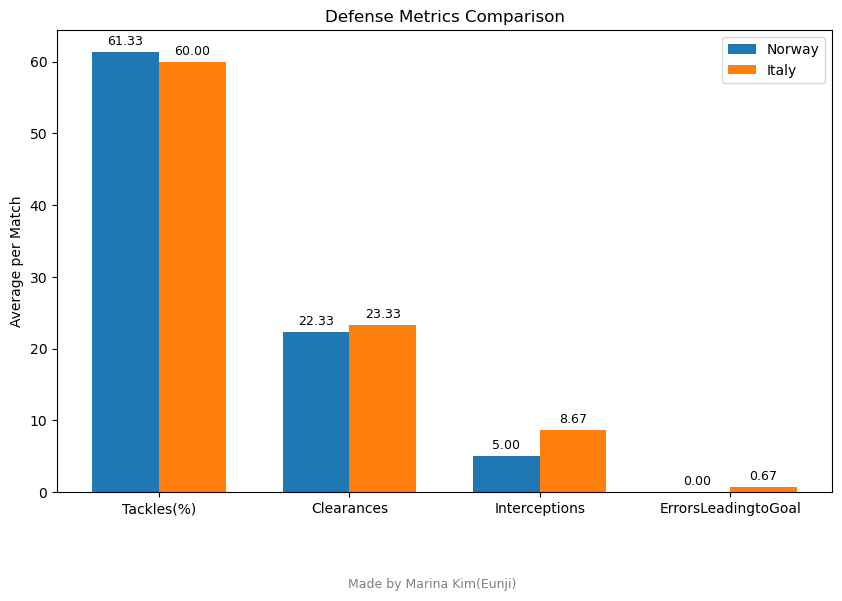

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
df = pd.read_csv("wteam_avg.csv")

# 노르웨이와 이탈리아 데이터만 추출
teams_of_interest = ['Norway', 'Italy']
df_filtered = df[df['Team'].isin(teams_of_interest)].set_index('Team')

# 함수: 바 그래프에 값 표시
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

# 1) 점유율 비교
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(df_filtered.index, df_filtered['Possession(%)'], color=['#1f77b4', '#ff7f0e'])
ax.set_title('Average Possession (%)')
ax.set_ylabel('Possession (%)')
ax.set_ylim(0, 100)
add_value_labels(ax, bars)
plt.figtext(0.5, -0.05, "Made by Marina Kim(Eunji)", ha="center", fontsize=9, color='gray')
plt.savefig("defense_metrics_comparison.png", bbox_inches='tight')
plt.show()

# 2) 공격 지표 비교
attack_metrics = ['Shots', 'ShotsOnTarget', 'Goals', 'xG', 'BigChances']
x = np.arange(len(attack_metrics))
width = 0.35

norway_attack = df_filtered.loc['Norway', attack_metrics].values
italy_attack = df_filtered.loc['Italy', attack_metrics].values

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, norway_attack, width, label='Norway', color='#1f77b4')
bars2 = ax.bar(x + width/2, italy_attack, width, label='Italy', color='#ff7f0e')

ax.set_xticks(x)
ax.set_xticklabels(attack_metrics)
ax.set_ylabel('Average per Match')
ax.set_title('Attack Metrics Comparison')
ax.legend()

add_value_labels(ax, bars1)
add_value_labels(ax, bars2)
plt.figtext(0.5, -0.05, "Made by Marina Kim(Eunji)", ha="center", fontsize=9, color='gray')
plt.savefig("attack_metrics_comparison.png", bbox_inches='tight')
plt.show()

# 3) 수비 지표 비교
defense_metrics = ['Tackles(%)', 'Clearances', 'Interceptions', 'ErrorsLeadingtoGoal']
norway_defense = df_filtered.loc['Norway', defense_metrics].values
italy_defense = df_filtered.loc['Italy', defense_metrics].values

x = np.arange(len(defense_metrics))

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, norway_defense, width, label='Norway', color='#1f77b4')
bars2 = ax.bar(x + width/2, italy_defense, width, label='Italy', color='#ff7f0e')

ax.set_xticks(x)
ax.set_xticklabels(defense_metrics)
ax.set_ylabel('Average per Match')
ax.set_title('Defense Metrics Comparison')
ax.legend()

add_value_labels(ax, bars1)
add_value_labels(ax, bars2)
plt.figtext(0.5, -0.05, "Made by Marina Kim(Eunji)", ha="center", fontsize=9, color='gray')
plt.savefig("defense_metrics_comparison.png", bbox_inches='tight')
plt.show()
